In [1]:
import numpy as np
import pandas as pd


In [2]:
#read the input file
dataset = pd.read_excel('groceries.xlsx',header=None)

In [6]:
#checking first 5 samples
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#shape
dataset.shape

(9835, 32)

In [7]:
#making each grocery row items an identical list
transaction_row = []
for i in range(0,9835):
    transaction_row.append([str(dataset.values[i,u]) for u in range(1,32)])

In [9]:
from mlxtend.preprocessing import TransactionEncoder
 
one_hot = TransactionEncoder()
one_hot_matrix = one_hot.fit(transaction_row).transform(transaction_row)
print(one_hot_matrix)
df = pd.DataFrame(one_hot_matrix, columns=one_hot.columns_)
df

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#deleting nan column
del df['nan']


In [11]:

df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#let us return top 10 frequent itemsets
frequent_itemsets = apriori(df, min_support=0.07, use_colnames=True, verbose=1).sort_values(by=['support'],ascending=False)
frequent_itemsets

Processing 90 combinations | Sampling itemset size 2


,support,itemsets
8,0.182613,(whole milk)
4,0.149771,(rolls/buns)
2,0.146721,(other vegetables)
7,0.144484,(soda)
9,0.116624,(yogurt)
6,0.093645,(shopping bags)
0,0.093238,(bottled water)
5,0.079715,(root vegetables)
3,0.075547,(pastry)
1,0.074123,(newspapers)


[Text(0, 0, "frozenset({'whole milk'})"),
 Text(0, 0, "frozenset({'rolls/buns'})"),
 Text(0, 0, "frozenset({'other vegetables'})"),
 Text(0, 0, "frozenset({'soda'})"),
 Text(0, 0, "frozenset({'yogurt'})"),
 Text(0, 0, "frozenset({'shopping bags'})"),
 Text(0, 0, "frozenset({'bottled water'})"),
 Text(0, 0, "frozenset({'root vegetables'})"),
 Text(0, 0, "frozenset({'pastry'})"),
 Text(0, 0, "frozenset({'newspapers'})")]

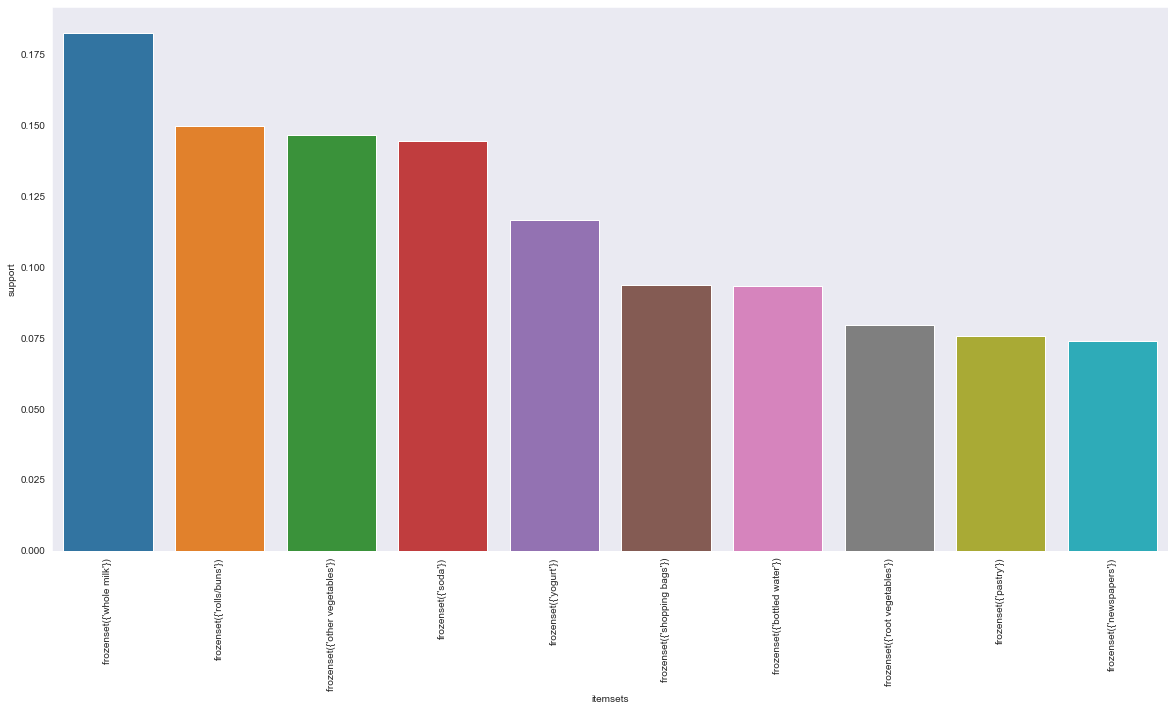

In [30]:
#data visulaization
#Plotting the frequentitemsets
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
plt.figure(figsize=(20,10))
s = sns.barplot(x=frequent_itemsets.itemsets, y=frequent_itemsets.support)
s.set_xticklabels(s.get_xticklabels(), rotation=90)


In [32]:
#Generating top 10 rules based on lift
frequent_items = apriori(df, min_support=0.03, use_colnames=True, verbose=1)
rules = association_rules(frequent_items, metric="lift", min_threshold = 1.2).sort_values(by=['lift'],ascending=False)
rules.head(10)

Processing 39 combinations | Sampling itemset size 3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(root vegetables),(other vegetables),0.079715,0.146721,0.037011,0.464286,3.164414,0.025315,1.592788
3,(other vegetables),(root vegetables),0.146721,0.079715,0.037011,0.252252,3.164414,0.025315,1.230742
12,(whole milk),(root vegetables),0.182613,0.079715,0.038129,0.208797,2.619288,0.023572,1.163147
13,(root vegetables),(whole milk),0.079715,0.182613,0.038129,0.478316,2.619288,0.023572,1.566825
4,(whole milk),(other vegetables),0.182613,0.146721,0.060702,0.332405,2.265562,0.033908,1.278140
5,(other vegetables),(whole milk),0.146721,0.182613,0.060702,0.413721,2.265562,0.033908,1.394195
14,(whole milk),(yogurt),0.182613,0.116624,0.047077,0.257795,2.210475,0.025780,1.190205
15,(yogurt),(whole milk),0.116624,0.182613,0.047077,0.403662,2.210475,0.025780,1.370677
6,(yogurt),(other vegetables),0.116624,0.146721,0.036706,0.314734,2.145121,0.019594,1.245180
7,(other vegetables),(yogurt),0.146721,0.116624,0.036706,0.250173,2.145121,0.019594,1.178106
